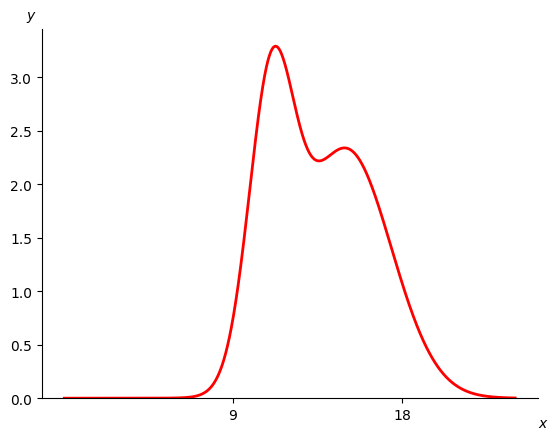

In [29]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
import sympy as sp
import seaborn as sns

# Задаємо символьну змінну x
x_sym = sp.symbols('x')

# Задаємо функцію
def func(x):
    return 2*(4/(1.2*sp.sqrt(2*sp.pi)) * sp.exp(-0.5*((x-11)/1.2)**2) + 7/(2.4*sp.sqrt(2*sp.pi)) * sp.exp(-0.5*((x-15)/2.4)**2))

# Конвертуємо символьну функцію в числову
func_numeric = sp.lambdify(x_sym, func(x_sym), 'numpy')

# Границі інтегрування
a, b = 9, 18  # integral limits

# Діапазон зміни x
x = np.linspace(0, 24, 1000)
# Розраховуємо значення y
y = func_numeric(x)

fig, ax = plt.subplots()
ax.plot(x, y, 'r', linewidth=2)
ax.set_ylim(bottom=0)

# Оформлюємо область
# Генеруємо значення x та y в області інтегрування
n = 1000
ix = np.linspace(a, b,n)
iy = func(ix)

# Додаємо шкалу на осі x
ax.set_xticks(np.arange(a, b+1, 1))
ax.set_xticklabels(['$a$'] + ['$'+str(i)+'$' for i in range(a+1, b)] + ['$b$'])

# Додамо проміжні лінії
ax.grid(True, linestyle='-.')


# Підписуємо осі
fig.text(0.9, 0.05, '$x$')
fig.text(0.1, 0.9, '$y$')

# Ховаємо верхню та праву границі
ax.spines[['top', 'right']].set_visible(False)

# Змінюємо підписи на осях
ax.set_xticks([a, b], labels=['$9$', '$18$'])
#ax.set_yticks([])

plt.grid()
plt.show()


In [13]:
import sympy as sp

# Задаємо символьну змінну x
x = sp.symbols('x')

# Задаємо функцію
f = 2 * (4 / (1.2 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 11) / 1.2) ** 2) +
         7 / (2.4 * sp.sqrt(2 * sp.pi)) * sp.exp(-0.5 * ((x - 15) / 2.4) ** 2))

# Знаходимо визначений інтеграл від a до b
a, b = 9, 18
definite_integral = sp.integrate(f, (x, a, b))
print("Визначений інтеграл від {} до {}: {}".format(a, b, definite_integral))

# Знаходимо невизначений інтеграл
indefinite_integral = sp.integrate(f, x)
print("Невизначений інтеграл:", indefinite_integral)

Визначений інтеграл від 9 до 18: 14.178654163478*sqrt(2)
Невизначений інтеграл: 4.94974746830583*sqrt(2)*erf(0.294627825494395*x - 4.41941738241592) + 2.82842712474619*sqrt(2)*erf(0.58925565098879*x - 6.48181216087669)


In [14]:
def rectangle_method(f, a, b, n):
    """
    Чисельне інтегрування методом прямокутників.

    :param f: функція, що інтегрується
    :param a: нижня межа інтегрування
    :param b: верхня межа інтегрування
    :param n: кількість прямокутників (крок інтегрування)
    :return: значення чисельного інтегралу
    """
    dx = (b - a) / n  # ширина кожного прямокутника
    integral = 0
    for i in range(n):
        x_left = a + i * dx  # ліва границя прямокутника
        x_right = a + (i + 1) * dx  # права границя прямокутника
        x_mid = (x_left + x_right) / 2  # середина прямокутника
        integral += f(x_mid) * dx  # площа прямокутника f(x) * dx
    return integral

    # Задаємо функцію
def func(x):
    return 2*(4/(1.2*sp.sqrt(2*sp.pi)) * sp.exp(-0.5*((x-11)/1.2)**2) + 7/(2.4*sp.sqrt(2*sp.pi)) * sp.exp(-0.5*((x-15)/2.4)**2))

# Границі інтегрування
a, b = 9, 18

# Кількість прямокутників
n = 1000

# Обчислення інтегралу методом прямокутників
integral_rectangle = rectangle_method(func, a, b, n)

print("Значення інтегралу методом прямокутників:", integral_rectangle)

Значення інтегралу методом прямокутників: 25.1310168666622*sqrt(2)/sqrt(pi)


In [15]:
def trapezoidal_method(f, a, b, n):
    """
    Чисельне інтегрування методом трапецій.

    :param f: функція, що інтегрується
    :param a: нижня межа інтегрування
    :param b: верхня межа інтегрування
    :param n: кількість трапецій (крок інтегрування)
    :return: значення чисельного інтегралу
    """
    dx = (b - a) / n  # ширина кожної трапеції
    integral = 0.5 * (f(a) + f(b))  # додамо значення функції на початку та в кінці
    for i in range(1, n):
        x_i = a + i * dx  # x координата точки
        integral += f(x_i)  # додаємо значення функції в кожній точці
    integral *= dx  # помножимо суму на ширину трапеції
    return integral

    # Границі інтегрування
a, b = 9, 18

# Кількість трапецій
n = 1000

# Обчислення інтегралу методом трапецій
integral_trapezoidal = trapezoidal_method(func, a, b, n)

print("Значення інтегралу методом трапецій:", integral_trapezoidal)

Значення інтегралу методом трапецій: 25.1309967848198*sqrt(2)/sqrt(pi)


In [16]:
def simpsons_method(f, a, b, n):
    """
    Чисельне інтегрування методом Сімпсона.

    :param f: функція, що інтегрується
    :param a: нижня межа інтегрування
    :param b: верхня межа інтегрування
    :param n: кількість підінтервалів (парне число)
    :return: значення чисельного інтегралу
    """
    if n % 2 != 0:
        raise ValueError("Кількість підінтервалів повинна бути парним числом")

    dx = (b - a) / n  # ширина кожного підінтервалу
    x_values = np.linspace(a, b, n + 1)  # значення x на всіх підінтервалах
    integral = f(a) + f(b)  # додамо значення функції на початку та в кінці
    for i in range(1, n, 2):
        integral += 4 * f(x_values[i])  # додаємо 4 рази значення функції в кожній другій точці
    for i in range(2, n-1, 2):
        integral += 2 * f(x_values[i])  # додаємо 2 рази значення функції в кожній другій точці, починаючи з другої
    integral *= dx / 3  # помножимо суму на (dx/3)
    return integral

    # Границі інтегрування
a, b = 9, 18

# Кількість підінтервалів (повинно бути парним числом)
n = 1000

# Обчислення інтегралу методом Сімпсона
integral_simpson = simpsons_method(func, a, b, n)

print("Значення інтегралу методом Сімпсона:", integral_simpson)

Значення інтегралу методом Сімпсона: 25.1310101727241*sqrt(2)/sqrt(pi)


In [17]:
import scipy.integrate as spi

# Границі інтегрування
a, b = 9, 18

# Обчислення інтегралу за допомогою quad
result, error = spi.quad(func, a, b)

print("Значення інтегралу:", result)
print("Похибка оцінки:", error)

Значення інтегралу: 20.051645014188296
Похибка оцінки: 1.2672390114804206e-11
